In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import plotly.express as px

# modelling
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.decomposition import PCA

# import a bunch of clustering models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

In [3]:
df = pd.read_csv('Use this dataset/uswtdb_v5_0_20220427_rename.csv',
                 index_col=False)

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_87862/2769116822.py:1: DtypeWarning: Columns (1,2,3,4,6,7,8,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Use this dataset/uswtdb_v5_0_20220427_rename.csv',


In [4]:
df.shape

(71784, 124)

In [5]:
df.head()

Plant Id Combined Heat And\nPower Plant Nuclear Unit Id   Plant Name  \
0       1.0                              N               .   Sand Point   
1      90.0                              N               .  Snake River   
2      90.0                              N               .  Snake River   
3      90.0                              N               .  Snake River   
4      90.0                              N               .  Snake River   

                    Operator Name  Operator Id Plant State Census Region  \
0  TDX Sand Point Generating, LLC      63560.0          AK          PACN   
1      Nome Joint Utility Systems      13642.0          AK          PACN   
2      Nome Joint Utility Systems      13642.0          AK          PACN   
3      Nome Joint Utility Systems      13642.0          AK          PACN   
4      Nome Joint Utility Systems      13642.0          AK          PACN   

  NERC Region  Reserved  NAICS Code  EIA Sector Number       Sector Name  \
0         NaN       NaN        22.0                1.0  Electric Utility   
1         NaN       NaN        22.0                1.0  Electric Utility   
2         NaN       NaN        22.0                1.0  Electric Utility   
3         NaN       NaN        22.0                1.0  Electric Utility   
4         NaN       NaN        22.0                1.0  Electric Utility   

  Reported\nPrime Mover Reported\nFuel Type Code AER\nFuel Type Code  \
0                    WT                      WND                 WND   
1                    WT                      WND                 WND   
2                    WT                      WND                 WND   
3                    WT                      WND                 WND   
4                    WT                      WND                 WND   

  Balancing\nAuthority Code Respondent\nFrequency  Physical\nUnit Label  \
0                       NaN                     A                   NaN   
1                       NaN                     A                   NaN   
2                       NaN                     A                   NaN   
3                       NaN                     A                   NaN   
4                       NaN                     A                   NaN   

  Quantity\nJanuary Quantity\nFebruary Quantity\nMarch Quantity\nApril  \
0                 0                  0               0               0   
1                 0                  0               0               0   
2                 0                  0               0               0   
3                 0                  0               0               0   
4                 0                  0               0               0   

  Quantity\nMay Quantity\nJune Quantity\nJuly Quantity\nAugust  \
0             0              0              0                0   
1             0              0              0                0   
2             0              0              0                0   
3             0              0              0                0   
4             0              0              0                0   

  Quantity\nSeptember Quantity\nOctober Quantity\nNovember Quantity\nDecember  \
0                   0                 0                  0                  0   
1                   0                 0                  0                  0   
2                   0                 0                  0                  0   
3                   0                 0                  0                  0   
4                   0                 0                  0                  0   

  Elec_Quantity\nJanuary Elec_Quantity\nFebruary Elec_Quantity\nMarch  \
0                      0                       0                    0   
1                      0                       0                    0   
2                      0                       0                    0   
3                      0                       0                    0   
4                      0                       0            

## Missing Model Specs 

In [6]:
df.isnull().sum()

Plant Id                                7794
Combined Heat And\nPower Plant          7794
Nuclear Unit Id                         7794
Plant Name                              7794
Operator Name                           7794
Operator Id                             7794
Plant State                             7794
Census Region                           7794
NERC Region                             7973
Reserved                               71784
NAICS Code                              7794
EIA Sector Number                       7794
Sector Name                             7794
Reported\nPrime Mover                   7794
Reported\nFuel Type Code                7794
AER\nFuel Type Code                     7794
Balancing\nAuthority Code               7965
Respondent\nFrequency                   7796
Physical\nUnit Label                   71784
Quantity\nJanuary                       7794
Quantity\nFebruary                      7794
Quantity\nMarch                         7794
Quantity\n

In [7]:
unique_plants = df['eia_id'].nunique()
print(f'we have {unique_plants} unique plants before removing null values')

we have 1207 unique plants before removing null values


In [8]:
unique_projects = df['project_name'].nunique()
print(f'we have {unique_projects} unique projects before removing null values')

we have 1726 unique projects before removing null values


### Missing EIA_ID

In [9]:
missing_values = len(df[df.eia_id.isnull()])
print(missing_values)

6207


In [10]:
unique_turbines = len(df)
print(f'we are dropping {(missing_values/unique_turbines)*100:.2f}% of the data')
df = df[~df.eia_id.isnull()]
unique_turbines = len(df)
print(f'we have {unique_turbines} unique projects after removing null values')

we are dropping 8.65% of the data
we have 65577 unique projects after removing null values


### Turbine Capacity

In [11]:
missing_values=len(df[df['turbine_capacity (KW)'].isnull()])
print(missing_values)

929


In [12]:
print(f'we are dropping {(missing_values/unique_turbines)*100:.2f}% of the data')
df = df[~df['turbine_capacity (KW)'].isnull()]
unique_turbines = len(df)
print(f'we have {unique_turbines} unique projects after removing null values')

we are dropping 1.42% of the data
we have 64648 unique projects after removing null values


## Model

In [13]:
# are the columns the same?
a = df['Elec Fuel Consumption\nMMBtu'] == df['Total Fuel Consumption\nMMBtu']
# assert all of the a.value_counts() are true
assert all(a.value_counts())==True, 'The columns are not the same'

In [14]:
df.isnull().sum()

Plant Id                                1531
Combined Heat And\nPower Plant          1531
Nuclear Unit Id                         1531
Plant Name                              1531
Operator Name                           1531
Operator Id                             1531
Plant State                             1531
Census Region                           1531
NERC Region                             1701
Reserved                               64648
NAICS Code                              1531
EIA Sector Number                       1531
Sector Name                             1531
Reported\nPrime Mover                   1531
Reported\nFuel Type Code                1531
AER\nFuel Type Code                     1531
Balancing\nAuthority Code               1701
Respondent\nFrequency                   1531
Physical\nUnit Label                   64648
Quantity\nJanuary                       1531
Quantity\nFebruary                      1531
Quantity\nMarch                         1531
Quantity\n

In [15]:
features = ['eia_id',
            'turbine_capacity (KW)',
            'hub_height (m)',
            'rotor_diameter (m)',
            'rotor_swept area (m2)',
            'max_height (m)',
            'xlong','ylat']

In [16]:
# group by turbine_capacity (KW) and project_name
model_df = df[features]

In [17]:
model_df.shape

(64648, 8)

In [18]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64648 entries, 1 to 71783
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   eia_id                 64648 non-null  float64
 1   turbine_capacity (KW)  64648 non-null  float64
 2   hub_height (m)         64008 non-null  float64
 3   rotor_diameter (m)     64246 non-null  float64
 4   rotor_swept area (m2)  64246 non-null  float64
 5   max_height (m)         64007 non-null  float64
 6   xlong                  64648 non-null  float64
 7   ylat                   64648 non-null  float64
dtypes: float64(8)
memory usage: 4.4 MB


## Numerical Features

In [19]:
model_df.describe()

eia_id  turbine_capacity (KW)  hub_height (m)  \
count  64648.000000           64648.000000    64008.000000   
mean   58133.513055            1974.941576       81.373633   
std     5317.846899             702.519645       11.388520   
min       90.000000              50.000000       22.800000   
25%    56776.000000            1500.000000       80.000000   
50%    57793.500000            2000.000000       80.000000   
75%    60366.000000            2300.000000       87.500000   
max    65270.000000            6000.000000      131.000000   

       rotor_diameter (m)  rotor_swept area (m2)  max_height (m)  \
count        64246.000000           64246.000000    64007.000000   
mean            96.135789            7665.433845      129.604739   
std             22.757731            3271.550756       21.154158   
min             15.000000             176.710000       30.400000   
25%             82.000000            5281.020000      121.000000   
50%            100.000000            7853.980000      130.100000   
75%            112.000000            9852.030000      145.100000   
max            155.000000           18869.190000      199.600000   

              xlong          ylat  
count  64648.000000  64648.000000  
mean     -99.554930     38.567768  
std       10.802928      5.471205  
min     -170.498276     17.970871  
25%     -102.478103     34.205523  
50%      -99.069828     39.313633  
75%      -94.913513     42.991355  
max      -65.610001     66.839905

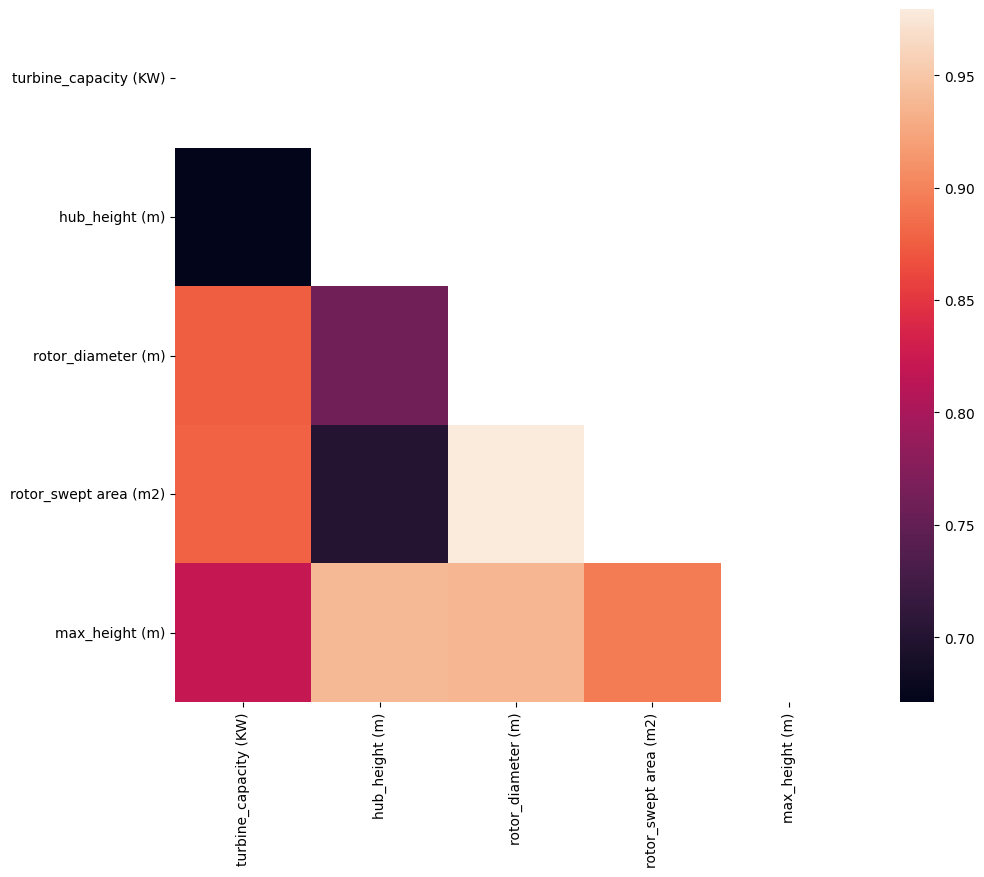

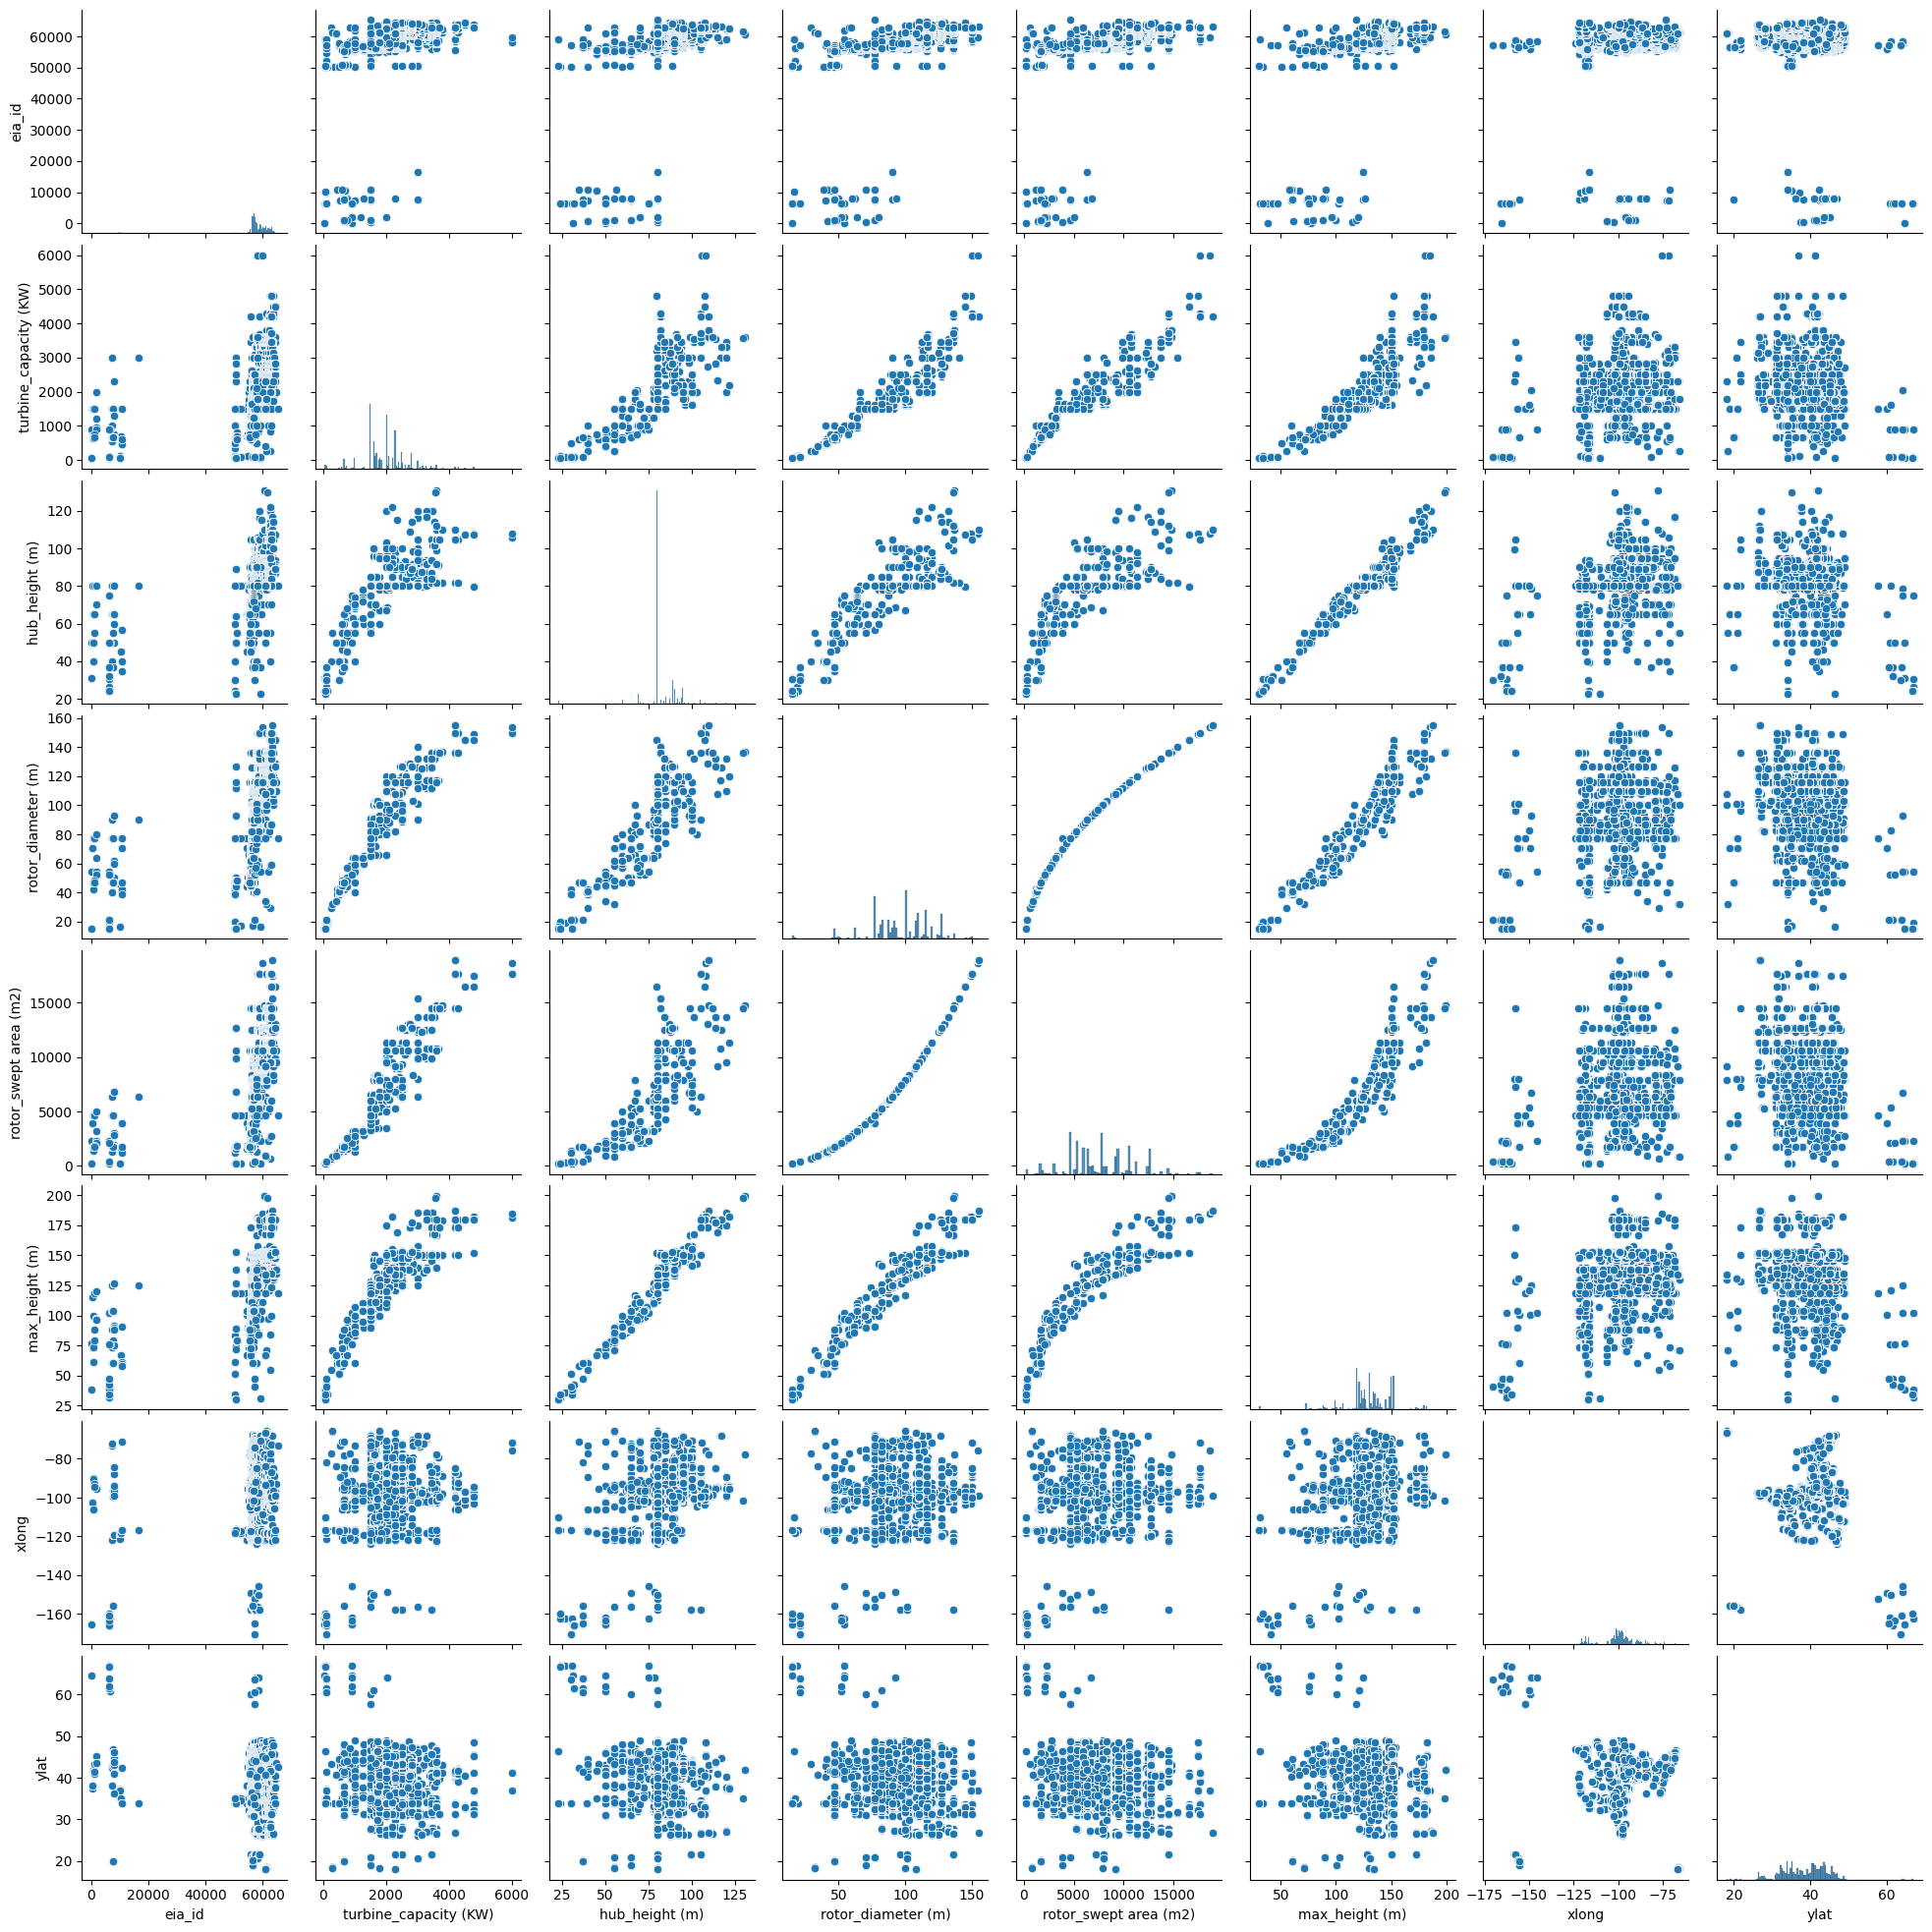

In [20]:
# plot a correlation matrix
import seaborn as sns
# remove xlong and ylat
corr_df = model_df.drop(['xlong','ylat','eia_id'], axis=1)
corr = corr_df.corr(numeric_only=True)

# show only half the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask)

# plot a pairplot
sns.pairplot(model_df)

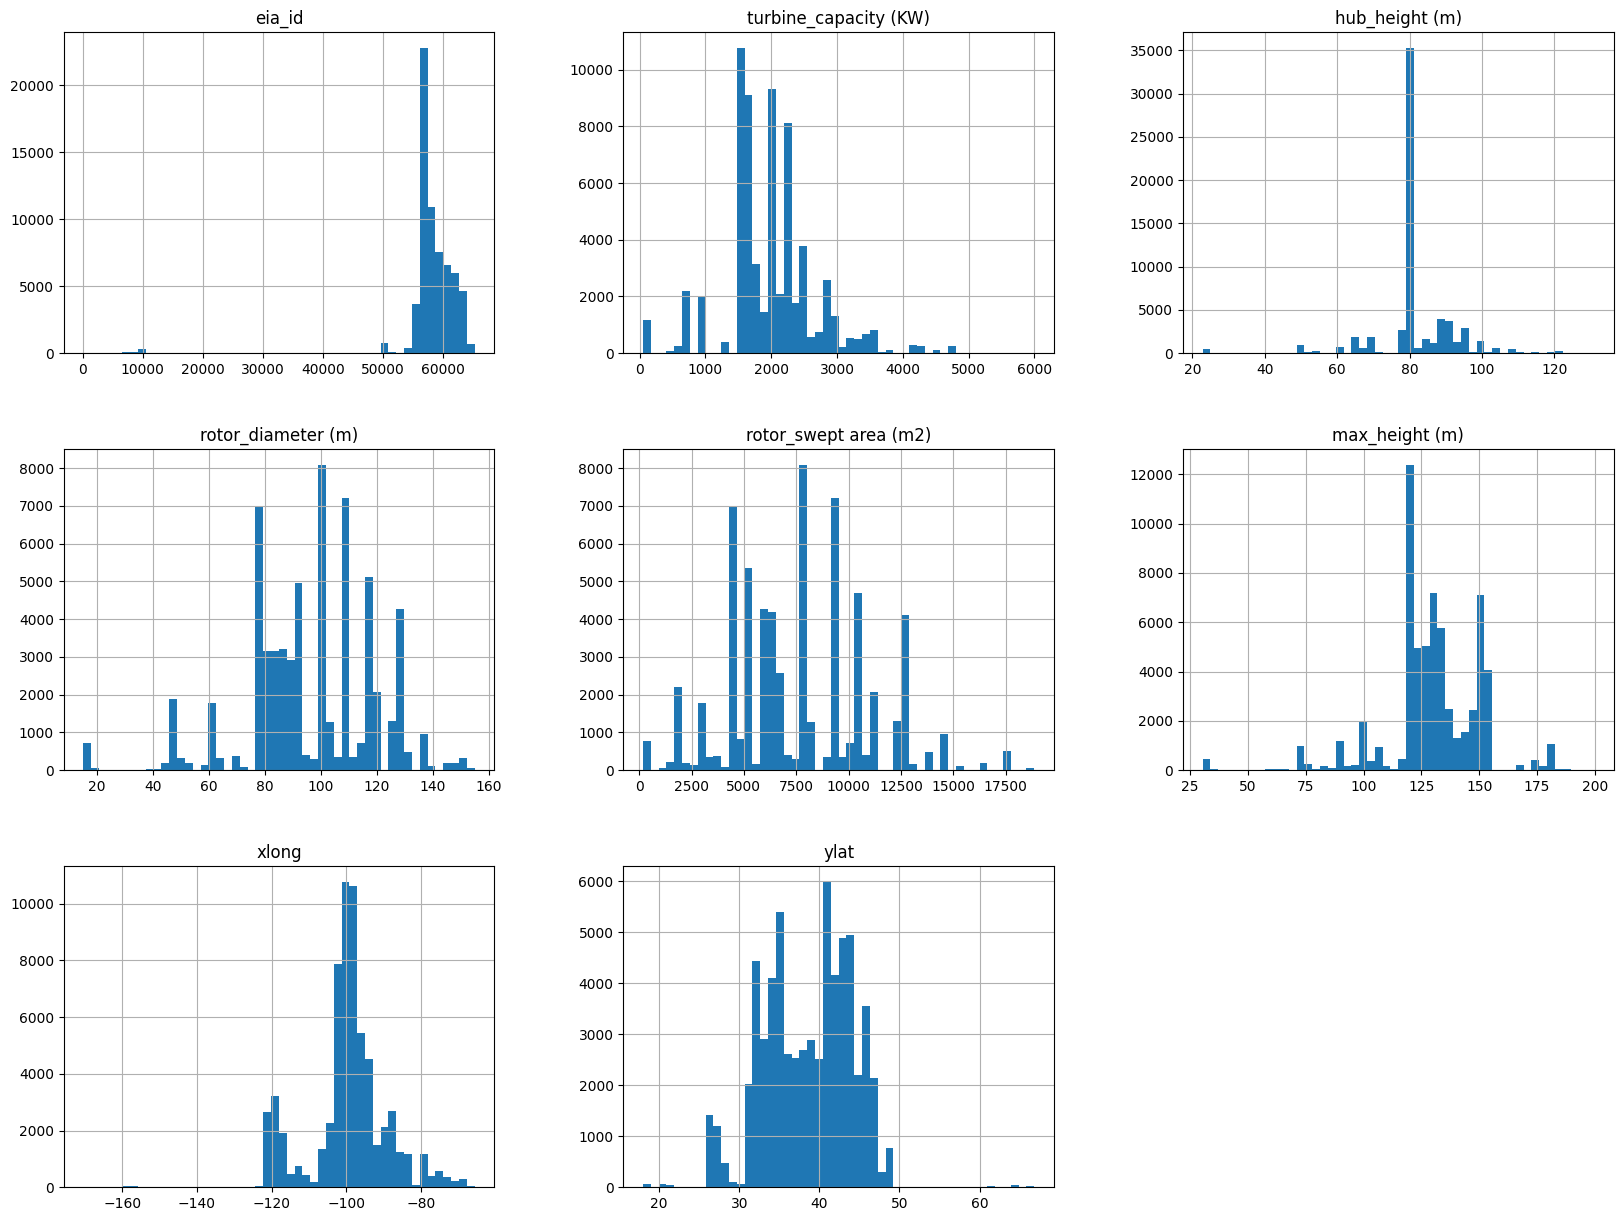

In [21]:
# plot histogram for each numerical feature
model_df.hist(bins=50, figsize=(20,15))
plt.show()

## 860 file

In [22]:
# read from second row
df_86 = pd.read_excel('Use this dataset/eia860_num_wt_Y2021.xlsx', skiprows=1)

In [23]:
df_86.head()

Utility ID                    Utility Name  Plant Code   Plant Name State  \
0       63560  TDX Sand Point Generating, LLC           1   Sand Point    AK   
1       63560  TDX Sand Point Generating, LLC           1   Sand Point    AK   
2       13642      Nome Joint Utility Systems          90  Snake River    AK   
3       13642      Nome Joint Utility Systems          90  Snake River    AK   
4       10633            City of Lamar - (CO)         508  Lamar Plant    CO   

           County Generator ID Status            Technology Prime Mover  \
0  Aleutians East          WT1     OS  Onshore Wind Turbine          WT   
1  Aleutians East          WT2     OA  Onshore Wind Turbine          WT   
2            Nome        EWT 1     OP  Onshore Wind Turbine          WT   
3            Nome        EWT 2     OP  Onshore Wind Turbine          WT   
4         Prowers        T1-T3     OP  Onshore Wind Turbine          WT   

        Sector Name  Sector  Nameplate Capacity (MW)  Summer Capacity (MW)  \
0  Electric Utility       1                      0.5                   0.1   
1  Electric Utility       1                      0.5                   0.3   
2  Electric Utility       1                      0.9                   0.9   
3  Electric Utility       1                      0.9                   0.9   
4  Electric Utility       1                      4.5                   4.0   

   Winter Capacity (MW)  Operating Month  Operating Year  Number of Turbines  \
0                   0.1               10            2011                   1   
1                   0.3               10            2011                   1   
2                   0.9                7            2013                   1   
3                   0.9                7            2013                   1   
4                   4.0                2            2004                   3   

  Predominant Turbine Manufacturer Predominant Turbine Model Number  \
0                           Vestas                          V39-500   
1                           Vestas                          V39-500   
2                              EWT                         DW54-900   
3                              EWT                         DW54-900   
4                               GE                          1.5 XLE   

   Design Wind Speed (mph)  Wind Quality Class  Turbine Hub Height (Feet)  
0                     19.0                   2                      155.0  
1                     19.0                   2                      155.0  
2                     20.0                   2                      164.0  
3                     20.0                   2                      164.0  
4                     19.0                   2                      262.4

In [24]:
# get nameplate capacity by plant Code
df_86 = df_86[['Plant Code', 'Nameplate Capacity (MW)', 'Summer Capacity (MW)', 'Winter Capacity (MW)','Number of Turbines','Sector Name','Utility Name']]

In [25]:
df_86.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant Code               1485 non-null   int64  
 1   Nameplate Capacity (MW)  1485 non-null   float64
 2   Summer Capacity (MW)     1485 non-null   float64
 3   Winter Capacity (MW)     1485 non-null   float64
 4   Number of Turbines       1485 non-null   int64  
 5   Sector Name              1485 non-null   object 
 6   Utility Name             1485 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 81.3+ KB


In [26]:
df_86.describe()

Plant Code  Nameplate Capacity (MW)  Summer Capacity (MW)  \
count   1485.000000              1485.000000           1485.000000   
mean   56441.230976                89.872121             89.396229   
std    10682.745044                93.603497             93.109783   
min        1.000000                 0.100000              0.100000   
25%    56636.000000                 7.900000              7.500000   
50%    57748.000000                62.500000             62.400000   
75%    60049.000000               150.000000            150.000000   
max    65484.000000               600.000000            582.300000   

       Winter Capacity (MW)  Number of Turbines  
count           1485.000000         1485.000000  
mean              89.337104           46.535354  
std               92.981993           48.851261  
min                0.100000            1.000000  
25%                7.500000            5.000000  
50%               62.400000           34.000000  
75%              150.000000           72.000000  
max              582.300000          460.000000

In [27]:
# consolidate by Plant Code but include Sector Name and Utility Name
df_860 = df_86.groupby(['Plant Code','Sector Name','Utility Name']).sum().reset_index()

In [28]:
# reset index of df_860 but keep the column
df_860.head()

Plant Code       Sector Name                    Utility Name  \
0           1  Electric Utility  TDX Sand Point Generating, LLC   
1          90  Electric Utility      Nome Joint Utility Systems   
2         508  Electric Utility            City of Lamar - (CO)   
3         692       IPP Non-CHP            SRIV Partnership LLC   
4         944  Electric Utility          City of Geneseo - (IL)   

   Nameplate Capacity (MW)  Summer Capacity (MW)  Winter Capacity (MW)  \
0                      1.0                   0.4                   0.4   
1                      1.8                   1.8                   1.8   
2                      6.0                   5.5                   5.5   
3                      6.2                   6.2                   6.2   
4                      3.0                   3.0                   3.0   

   Number of Turbines  
0                   2  
1                   2  
2                   4  
3                   9  
4                   2

## 923

In [29]:
df_92 = pd.read_excel('2023 Dataset/EIA923_Schedules_2_3_4_5_M_12_2021_Final_Revision.xlsx',skiprows=5)

In [30]:
df_92.head()

Plant Id Combined Heat And\nPower Plant Nuclear Unit Id    Plant Name  \
0         1                              N               .    Sand Point   
1         1                              N               .    Sand Point   
2         2                              N               .  Bankhead Dam   
3         3                              N               .         Barry   
4         3                              N               .         Barry   

                    Operator Name Operator Id Plant State Census Region  \
0  TDX Sand Point Generating, LLC       63560          AK          PACN   
1  TDX Sand Point Generating, LLC       63560          AK          PACN   
2                Alabama Power Co         195          AL           ESC   
3                Alabama Power Co         195          AL           ESC   
4                Alabama Power Co         195          AL           ESC   

  NERC Region  Reserved  NAICS Code  EIA Sector Number       Sector Name  \
0         NaN       NaN          22                  1  Electric Utility   
1         NaN       NaN          22                  1  Electric Utility   
2        SERC       NaN          22                  1  Electric Utility   
3        SERC       NaN          22                  1  Electric Utility   
4        SERC       NaN          22                  1  Electric Utility   

  Reported\nPrime Mover Reported\nFuel Type Code AER\nFuel Type Code  \
0                    IC                      DFO                 DFO   
1                    WT                      WND                 WND   
2                    HY                      WAT                 HYC   
3                    CA                       NG                  NG   
4                    CT                       NG                  NG   

  Balancing\nAuthority Code Respondent\nFrequency Physical\nUnit Label  \
0                       NaN                     A              barrels   
1                       NaN                     A                  NaN   
2                      SOCO                     A                  NaN   
3                      SOCO                     M                  mcf   
4                      SOCO                     M                  mcf   

  Quantity\nJanuary Quantity\nFebruary Quantity\nMarch Quantity\nApril  \
0               466                514             556             535   
1                 0                  0               0               0   
2                 0                  0               0               0   
3             37837              24972           22230           48459   
4           5414508            4389152         3125633         4196931   

  Quantity\nMay Quantity\nJune Quantity\nJuly Quantity\nAugust  \
0           277            372            363              524   
1             0              0              0                0   
2             0              0              0                0   
3         63513          87775          59474            62849   
4       4824327        5009255        5187450          5264905   

  Quantity\nSeptember Quantity\nOctober Quantity\nNovember Quantity\nDecember  \
0                 679               674                526                585   
1                   0                 0                  0                  0   
2                   0                 0                  0                  0   
3               42565             75889              25392              55729   
4             3393647           4352037            4690624            4249030   

  Elec_Quantity\nJanuary Elec_Quantity\nFebruary Elec_Quantity\nMarch  \
0                    466                     514                  556   
1                      0                       0                    0   
2                      0                       0                    0   
3                  37837                   24972                22230   
4                5414508                 4389152              3125

In [31]:
df_923 = df_92[['Plant Id', 'Reported\nPrime Mover','Plant State', 'Census Region', 'NERC Region','Elec Fuel Consumption\nMMBtu', 'Net Generation\n(Megawatthours)']]

In [32]:
# only keep WT and WS from Reported\nPrime Mover
df_923 = df_923[(df_923['Reported\nPrime Mover'] == 'WT') | (df_923['Reported\nPrime Mover'] == 'WS')]

In [33]:
df_923.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 1 to 15795
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Plant Id                        1280 non-null   int64  
 1   Reported
Prime Mover            1280 non-null   object 
 2   Plant State                     1280 non-null   object 
 3   Census Region                   1280 non-null   object 
 4   NERC Region                     1256 non-null   object 
 5   Elec Fuel Consumption
MMBtu     1280 non-null   int64  
 6   Net Generation
(Megawatthours)  1280 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 80.0+ KB


## Combining the dfs

In [34]:
print(f'there are {df_860["Plant Code"].nunique()} number of plants')
print(f'the shape is {df_860.shape}')

there are 1280 number of plants
the shape is (1280, 7)


In [35]:
print(f"there are {df_923['Plant Id'].nunique()} number of plants")
print(f'the shape is {df_923.shape}')

there are 1279 number of plants
the shape is (1280, 7)


In [36]:
# find out which Plant Id is missing from df_923 comapred to Plant Code from df_860
missing_plants = set(df_860['Plant Code']) - set(df_923['Plant Id'])
print(f'the ids missing from 923 are {missing_plants}')
missing_plants2 = set(df_923['Plant Id']) - set(df_860['Plant Code'])
print(f'the ids missing from 860 are {missing_plants2}')

the ids missing from 923 are {65129, 57547, 57517, 59022, 59023, 57263, 57264}
the ids missing from 860 are {55719, 56779, 57741, 59825, 58424, 99999}


In [37]:
# do an inner join between 860 and 923
intermediate_df = df_923.merge(df_860, left_on='Plant Id', right_on='Plant Code', how='inner')

In [38]:
print(f"there are {model_df['eia_id'].nunique()} number of plants")
print(f'the shape is {model_df.shape}')

there are 1200 number of plants
the shape is (64648, 8)


In [39]:
missing_plants = set(intermediate_df['Plant Code']) - set(model_df['eia_id'])
print(f'the ids missing from model_df are {missing_plants}')
missing_plants2 = set(model_df['eia_id']) - set(intermediate_df['Plant Code'])
print(f'the ids missing from intermediate_df are {missing_plants2}')

the ids missing from model_df are {1, 61442, 64003, 61444, 56840, 56336, 65048, 54299, 54300, 56587, 65059, 56588, 61990, 58925, 64054, 64065, 64066, 63574, 56409, 56410, 56411, 56412, 62570, 61041, 58995, 65143, 64638, 62592, 64130, 50821, 64138, 61583, 54931, 64662, 58025, 64172, 59053, 62642, 64178, 64183, 2240, 64710, 64230, 58089, 64750, 56570, 58112, 55561, 55562, 55563, 55564, 55565, 56586, 55567, 55568, 55569, 55570, 55571, 55572, 55573, 56589, 65316, 61734, 57136, 56626, 64332, 64336, 59223, 59224, 59225, 59226, 59227, 59228, 59736, 59230, 59231, 59232, 62809, 59235, 50532, 10597, 59757, 54647, 62333, 64381, 62855, 56199, 62857, 56200, 56201, 56202, 56204, 56205, 56206, 56207, 56208, 56209, 59797, 64407, 63384, 59295, 57248, 63393, 59817, 52142, 57791, 57792, 65478, 63431, 63432, 63433, 65479, 65484, 56276, 54750, 62442, 57835, 63981, 56824, 56825, 63482, 56827, 56828}
the ids missing from intermediate_df are {56834.0, 56964.0, 62853.0, 1158.0, 56712.0, 57741.0, 59022.0, 62608

In [40]:
turbine_df = model_df.groupby('eia_id').mean()

In [41]:
turbine_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1200 entries, 90.0 to 65270.0
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   turbine_capacity (KW)  1200 non-null   float64
 1   hub_height (m)         1186 non-null   float64
 2   rotor_diameter (m)     1193 non-null   float64
 3   rotor_swept area (m2)  1193 non-null   float64
 4   max_height (m)         1186 non-null   float64
 5   xlong                  1200 non-null   float64
 6   ylat                   1200 non-null   float64
dtypes: float64(7)
memory usage: 75.0 KB


In [42]:
turbine_df.head()

turbine_capacity (KW)  hub_height (m)  rotor_diameter (m)  \
eia_id                                                              
90.0               150.000000       33.323529           19.588235   
508.0             1500.000000       80.000000           70.500000   
692.0              696.666667       47.777778           45.888889   
944.0             1500.000000       65.000000           77.000000   
1158.0             750.000000       55.000000           48.000000   

        rotor_swept area (m2)  max_height (m)       xlong       ylat  
eia_id                                                                
90.0               425.358235       43.129412 -165.429702  64.567603  
508.0             3903.630000      115.200000 -102.557001  37.898615  
692.0             1657.273333       70.722222 -106.243062  41.834719  
944.0             4656.630000      100.000000  -90.154670  41.426136  
1158.0            1809.560000       78.900000  -94.538094  40.896694

In [43]:
# do an inner join between turbine_df and intermediate_df
final_df = intermediate_df.merge(turbine_df, left_on='Plant Code', right_on='eia_id', how='inner')

In [44]:
final_df.describe()

Plant Id  Elec Fuel Consumption\nMMBtu  \
count   1150.000000                  1.150000e+03   
mean   57348.349565                  2.864124e+06   
std     8002.916977                  2.995793e+06   
min       90.000000                  0.000000e+00   
25%    56783.250000                  4.399570e+05   
50%    57755.500000                  2.065976e+06   
75%    59962.000000                  4.376720e+06   
max    64623.000000                  2.046478e+07   

       Net Generation\n(Megawatthours)    Plant Code  Nameplate Capacity (MW)  \
count                     1.150000e+03   1150.000000              1150.000000   
mean                      3.238493e+05  57348.349565               109.766957   
std                       3.387373e+05   8002.916977               102.298774   
min                       0.000000e+00     90.000000                 1.000000   
25%                       4.974650e+04  56783.250000                21.000000   
50%                       2.336020e+05  57755.500000                98.000000   
75%                       4.948800e+05  59962.000000               169.275000   
max                       2.313973e+06  64623.000000               735.500000   

       Summer Capacity (MW)  Winter Capacity (MW)  Number of Turbines  \
count           1150.000000           1150.000000         1150.000000   
mean             109.162522            109.230435           56.926087   
std              101.849003            101.865995           54.971016   
min                0.400000              0.500000            1.000000   
25%               21.000000             21.000000           12.000000   
50%               97.900000             97.900000           48.000000   
75%              170.025000            171.175000           87.000000   
max              735.500000            735.500000          460.000000   

       turbine_capacity (KW)  hub_height (m)  rotor_diameter (m)  \
count            1150.000000     1136.000000         1143.000000   
mean             1988.192758       81.029055           93.908922   
std               712.166509       10.895422           22.089308   
min                65.000000       22.800000           15.300000   
25%              1500.000000       80.000000           82.000000   
50%              2000.000000       80.000000           92.000000   
75%              2316.071429       85.000000          110.000000   
max              6000.000000      130.000000          155.000000   

       rotor_swept area (m2)  max_height (m)        xlong         ylat  
count            1143.000000     1136.000000  1150.000000  1150.000000  
mean             7316.757595      128.149716   -98.686077    39.788586  
std              3213.338124       20.315572    14.217633     5.467074  
min               183.850000       30.400000  -165.429702    18.971340  
25%              5281.020000      121.000000  -103.278389    35.422244  
50%              6647.610000      126.314113   -98.349066    41.093591  
75%              9503.320000      139.900000   -92.784410    43.581857  
max             18869.190000      198.100000   -67.811062    66.837698

In [45]:
# remove 0 values from net generation
final_df = final_df[final_df['Net Generation\n(Megawatthours)'] != 0]
# remove 0 values from elec fuel consumption
final_df = final_df[final_df['Elec Fuel Consumption\nMMBtu'] != 0]

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1149
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Plant Id                        1137 non-null   int64  
 1   Reported
Prime Mover            1137 non-null   object 
 2   Plant State                     1137 non-null   object 
 3   Census Region                   1137 non-null   object 
 4   NERC Region                     1124 non-null   object 
 5   Elec Fuel Consumption
MMBtu     1137 non-null   int64  
 6   Net Generation
(Megawatthours)  1137 non-null   float64
 7   Plant Code                      1137 non-null   int64  
 8   Sector Name                     1137 non-null   object 
 9   Utility Name                    1137 non-null   object 
 10  Nameplate Capacity (MW)         1137 non-null   float64
 11  Summer Capacity (MW)            1137 non-null   float64
 12  Winter Capacity (MW)            11

In [47]:
final_df['uptime'] = final_df['Net Generation\n(Megawatthours)']/final_df['Nameplate Capacity (MW)']
final_df['efficiency'] = final_df['Net Generation\n(Megawatthours)']/final_df['Elec Fuel Consumption\nMMBtu']
final_df['avg_tgen'] = final_df['Net Generation\n(Megawatthours)']/final_df['Number of Turbines']
final_df['avg_fuel'] = final_df['Elec Fuel Consumption\nMMBtu']/final_df['Number of Turbines']
final_df['avg_tcap'] = final_df['Nameplate Capacity (MW)']/final_df['Number of Turbines']

In [48]:
final_df.head()

Plant Id Reported\nPrime Mover Plant State Census Region NERC Region  \
0        90                    WT          AK          PACN         NaN   
1       508                    WT          CO           MTN        WECC   
2       692                    WT          WY           MTN        WECC   
3       944                    WT          IL           ENC         MRO   
4      1172                    WT          IA           WNC         MRO   

   Elec Fuel Consumption\nMMBtu  Net Generation\n(Megawatthours)  Plant Code  \
0                         18837                           2130.0          90   
1                        112709                          12744.0         508   
2                        160021                          18094.0         692   
3                         54470                           6159.0         944   
4                         37198                           4206.0        1172   

        Sector Name                Utility Name  Nameplate Capacity (MW)  \
0  Electric Utility  Nome Joint Utility Systems                      1.8   
1  Electric Utility        City of Lamar - (CO)                      6.0   
2       IPP Non-CHP        SRIV Partnership LLC                      6.2   
3  Electric Utility      City of Geneseo - (IL)                      3.0   
4  Electric Utility        City of Osage - (IA)                      1.6   

   Summer Capacity (MW)  Winter Capacity (MW)  Number of Turbines  \
0                   1.8                   1.8                   2   
1                   5.5                   5.5                   4   
2                   6.2                   6.2                   9   
3                   3.0                   3.0                   2   
4                   0.5                   0.5                   1   

   turbine_capacity (KW)  hub_height (m)  rotor_diameter (m)  \
0             150.000000       33.323529           19.588235   
1            1500.000000       80.000000           70.500000   
2             696.666667       47.777778           45.888889   
3            1500.000000       65.000000           77.000000   
4            1500.000000       80.000000           77.000000   

   rotor_swept area (m2)  max_height (m)       xlong       ylat       uptime  \
0             425.358235       43.129412 -165.429702  64.567603  1183.333333   
1            3903.630000      115.200000 -102.557001  37.898615  2124.000000   
2            1657.273333       70.722222 -106.243062  41.834719  2918.387097   
3            4656.630000      100.000000  -90.154670  41.426136  2053.000000   
4            4656.630000      118.600000  -92.840591  43.292492  2628.750000   

   efficiency     avg_tgen      avg_fuel  avg_tcap  
0    0.113075  1065.000000   9418.500000  0.900000  
1    0.113070  3186.000000  28177.250000  1.500000  
2    0.113073  2010.444444  17780.111111  0.688889  
3    0.113071  3079.500000  27235.000000  1.500000  
4    0.113071  4206.000000  37198.000000  1.600000

In [49]:
# show in 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
final_df.describe()

Plant Id  Elec Fuel Consumption\nMMBtu  \
count   1137.00                       1137.00   
mean   57397.62                    2896871.65   
std     7908.39                    2997086.89   
min       90.00                        478.00   
25%    56793.00                     479123.00   
50%    57762.00                    2097902.00   
75%    59972.00                    4398492.00   
max    64623.00                   20464778.00   

       Net Generation\n(Megawatthours)  Plant Code  Nameplate Capacity (MW)  \
count                          1137.00     1137.00                  1137.00   
mean                         327552.11    57397.62                   110.91   
std                          338883.68     7908.39                   102.31   
min                              54.00       90.00                     1.00   
25%                           54175.00    56793.00                    22.40   
50%                          237212.00    57762.00                    98.80   
75%                          497342.00    59972.00                   171.70   
max                         2313973.00    64623.00                   735.50   

       Summer Capacity (MW)  Winter Capacity (MW)  Number of Turbines  \
count               1137.00               1137.00             1137.00   
mean                 110.29                110.36               57.12   
std                  101.86                101.88               53.70   
min                    0.40                  0.50                1.00   
25%                   21.60                 21.60               12.00   
50%                   98.70                 98.70               48.00   
75%                  172.00                174.00               87.00   
max                  735.50                735.50              426.00   

       turbine_capacity (KW)  hub_height (m)  rotor_diameter (m)  \
count                1137.00         1124.00             1130.00   
mean                 1995.31           81.20               94.23   
std                   705.28           10.69               21.80   
min                    65.00           28.59               16.50   
25%                  1500.00           80.00               82.00   
50%                  2000.00           80.00               92.36   
75%                  2335.16           85.00              110.00   
max                  6000.00          130.00              155.00   

       rotor_swept area (m2)  max_height (m)   xlong    ylat  uptime  \
count                1130.00         1124.00 1137.00 1137.00 1137.00   
mean                 7355.09          128.49  -98.67   39.80 2737.33   
std                  3193.33           19.94   14.17    5.45  929.56   
min                   213.82           41.53 -165.43   18.97   13.73   
25%                  5281.02          121.00 -103.28   35.42 2110.64   
50%                  6716.40          126.50  -98.40   41.10 2751.96   
75%                  9503.32          139.90  -92.78   43.56 3466.04   
max                 18869.19          198.10  -67.81   66.84 5750.48   

       efficiency  avg_tgen  avg_fuel  avg_tcap  
count     1137.00   1137.00   1137.00   1137.00  
mean         0.11   5545.01  49040.07      1.98  
std          0.00   2834.13  25065.02      0.71  
min          0.11      1.35     11.93      0.06  
25%          0.11   3634.20  32140.60      1.50  
50%          0.11   5244.23  46379.99      2.00  
75%          0.11   7300.02  64561.41      2.30  
max          0.11  24791.50 219256.50      6.00

In [50]:
# put to csv
final_df.to_csv('final_df.csv', index=False)

<AxesSubplot: >

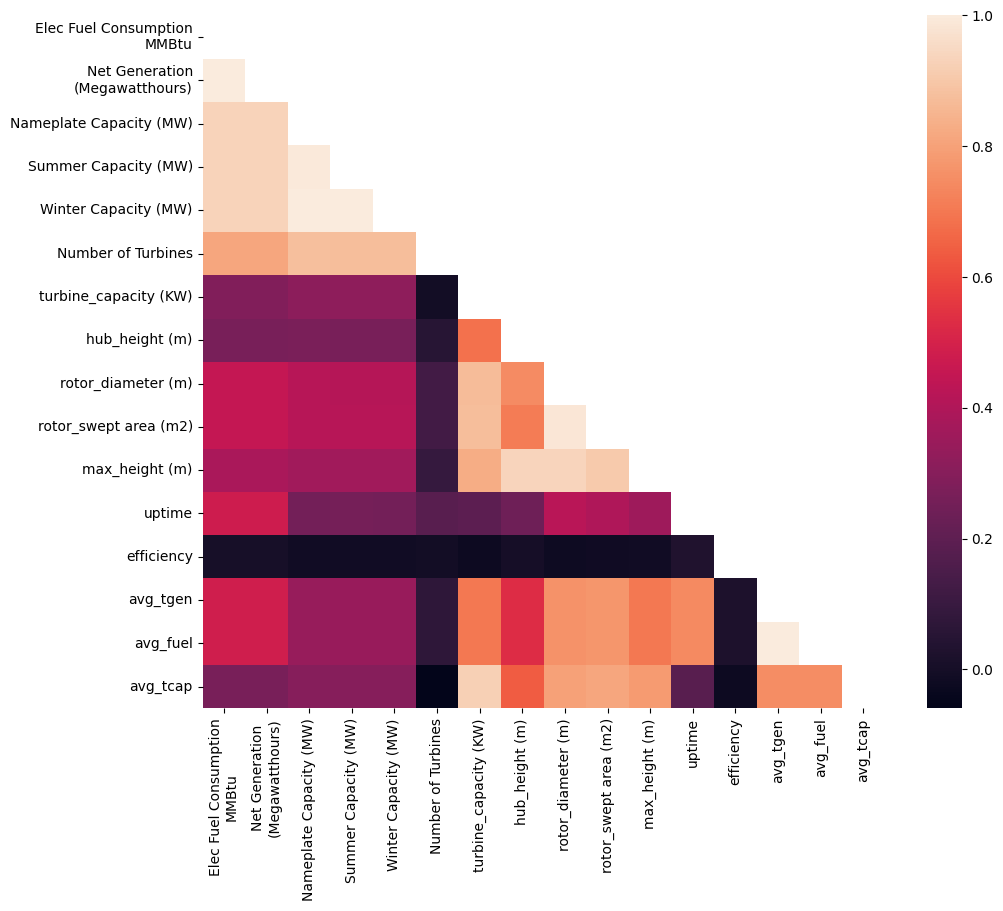

In [51]:
# remove xlong and ylat
corr_df = final_df.drop(['xlong','ylat','Plant Code','Plant Id'], axis=1)
corr = corr_df.corr(numeric_only=True)

# show only half the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask)

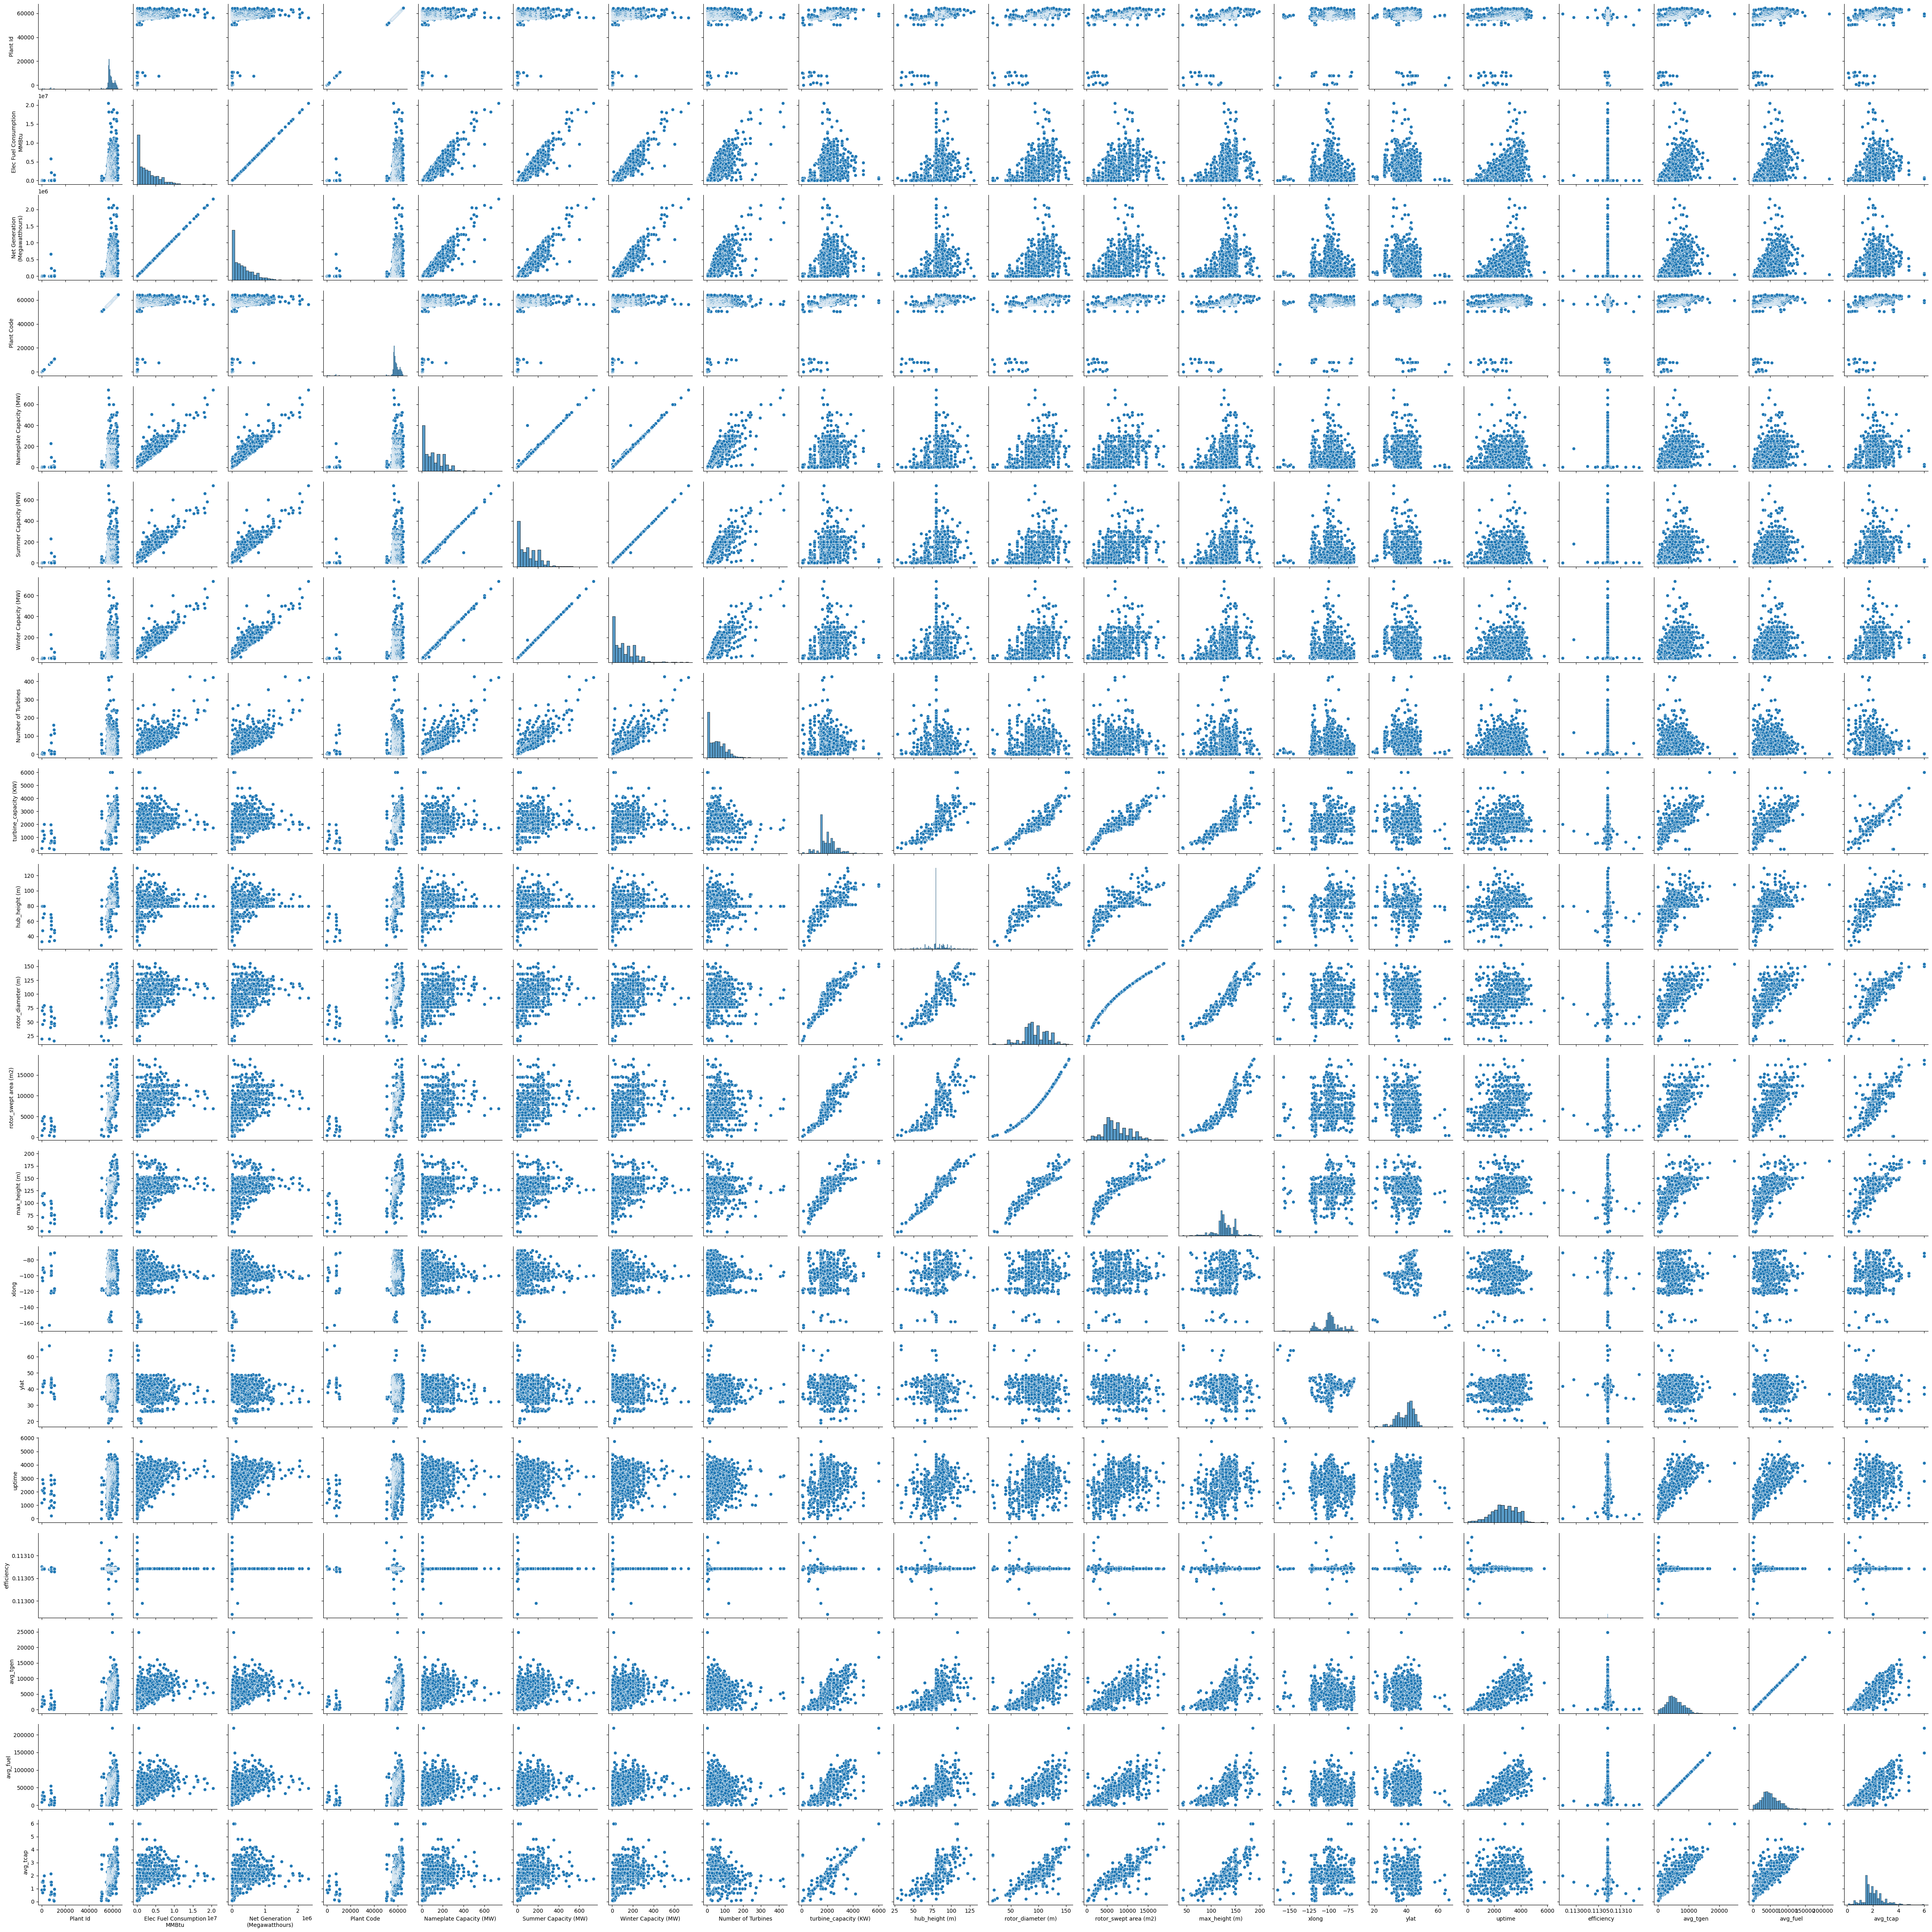

In [68]:
sns.pairplot(final_df)

## Pipeline

In [52]:
models = [
        ('KM', KMeans()),
        ('AC', AgglomerativeClustering()),
        ('BIR', Birch()),
        ('MBKM', MiniBatchKMeans()),
        ('OPT', OPTICS()),
        ('SC', SpectralClustering())
        # ('MS', MeanShift()),
        # ('DB', DBSCAN()),
        # ('AP', AffinityPropagation())
        ]

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 1149
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Plant Id                        1137 non-null   int64  
 1   Reported
Prime Mover            1137 non-null   object 
 2   Plant State                     1137 non-null   object 
 3   Census Region                   1137 non-null   object 
 4   NERC Region                     1124 non-null   object 
 5   Elec Fuel Consumption
MMBtu     1137 non-null   int64  
 6   Net Generation
(Megawatthours)  1137 non-null   float64
 7   Plant Code                      1137 non-null   int64  
 8   Sector Name                     1137 non-null   object 
 9   Utility Name                    1137 non-null   object 
 10  Nameplate Capacity (MW)         1137 non-null   float64
 11  Summer Capacity (MW)            1137 non-null   float64
 12  Winter Capacity (MW)            11

In [54]:
# drop features
dropped_features = ['xlong', 'ylat', 'Plant Id','Reported\nPrime Mover','Plant State', 'Census Region', 'NERC Region','Plant Code',
                    'Number of Turbines','turbine_capacity (KW)','Sector Name','Utility Name',
                    'Net Generation\n(Megawatthours)', 'Elec Fuel Consumption\nMMBtu', 'Nameplate Capacity (MW)', 'Summer Capacity (MW)', 'Winter Capacity (MW)',
                    'hub_height (m)', 'rotor_diameter (m)', 'rotor_swept area (m2)', 'max_height (m)']

In [55]:
X = final_df.drop(dropped_features, axis=1)

In [56]:
# setup the ordinal features
# ordinal_features = ['education']
# order = [['basic.4y', 'basic.6y','basic.9y', 'high.school','professional.course','university.degree']]

# setup the numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# for idp_var in ordinal_features:
    # while idp_var in categorical_features:
        # categorical_features.remove(idp_var)

In [58]:
inertia = []
s_score = []
db_score = []
ch_score = []
clusters = [2,3,4,5,6]

preprocessor = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(),numerical_features),
    # ('tnf2',OrdinalEncoder(categories=order),ordinal_features),
    ('tnf3',OneHotEncoder(),categorical_features)
# ])
], remainder='passthrough')

print('intertia: lower is better, s_score: close to 1 is better, db_score: closer to 0 is better, ch_score: higher is better')

# optimize clusters for unknown data labels
for name, model in models:
    for i in clusters:
        n_model = KMeans(n_clusters = i, random_state =42)
        
        print(f'running {model} with {i} clusters')    
        pipeline = Pipeline([('preprocessor', preprocessor),
                            #  ("dimred_step", PCA(n_components=4)),
                             ('cluster', n_model)])
        pipeline.fit(X)
        inertia.append(pipeline.named_steps['cluster'].inertia_)
        print(f'for clusters = {i}, the inertia is : {pipeline.named_steps["cluster"].inertia_}')
        cluster_labels = pipeline.named_steps['cluster'].labels_

        silhouette_avg = silhouette_score(X, cluster_labels)
        s_score.append(silhouette_avg)
        print(f'for clusters = {i}, the average silhouette_score is : {silhouette_avg}')

        db = davies_bouldin_score(X, cluster_labels)
        db_score.append(db)
        print(f'for clusters = {i}, the Davies-Bouldin Index is : {db}')

        ch = calinski_harabasz_score(X, cluster_labels)
        ch_score.append(ch)
        print(f'for clusters = {i}, the Calinski-Harabasz Index is : {ch}')

        print(len(cluster_labels))
        
    break

intertia: lower is better, s_score: close to 1 is better, db_score: closer to 0 is better, ch_score: higher is better
running KMeans() with 2 clusters
for clusters = 2, the inertia is : 3446.357886228826
for clusters = 2, the average silhouette_score is : 0.551849517137393
for clusters = 2, the Davies-Bouldin Index is : 0.6092618562678296
for clusters = 2, the Calinski-Harabasz Index is : 1880.2212819821848
1137
running KMeans() with 3 clusters
for clusters = 3, the inertia is : 2780.669215599392
for clusters = 3, the average silhouette_score is : 0.48973254475968
for clusters = 3, the Davies-Bouldin Index is : 0.5987430269320104
for clusters = 3, the Calinski-Harabasz Index is : 2056.0873854652978
1137
running KMeans() with 4 clusters
for clusters = 4, the inertia is : 2166.3170026704483
for clusters = 4, the average silhouette_score is : 0.382566802156535
for clusters = 4, the Davies-Bouldin Index is : 0.6524985003482383
for clusters = 4, the Calinski-Harabasz Index is : 1385.2920950

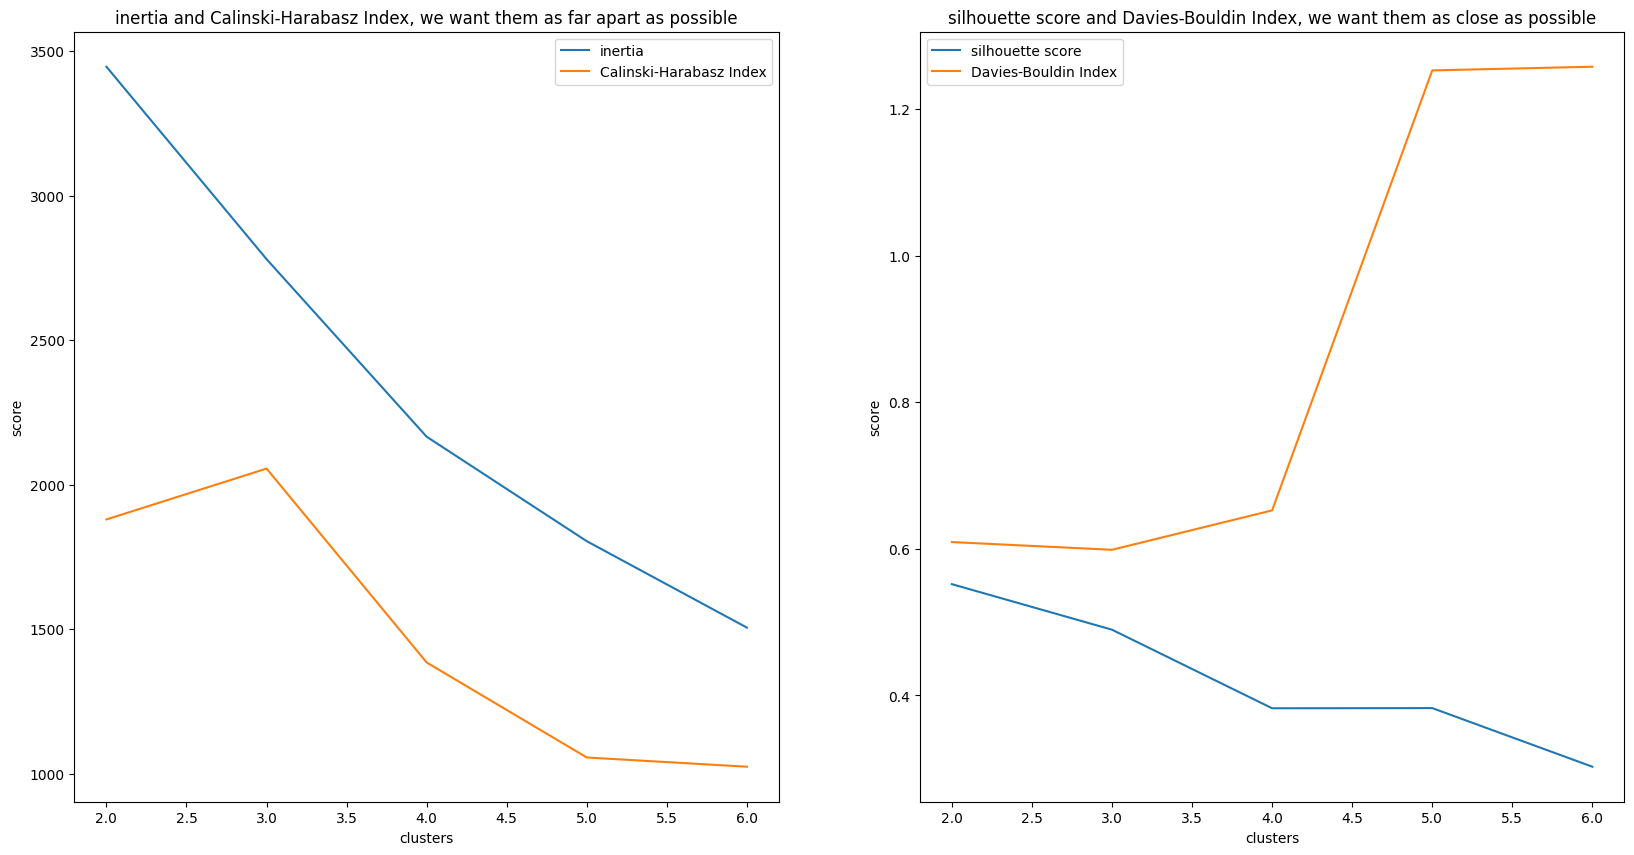

In [59]:
# plot inertia and Calinski-Harabasz Index on one index, silhouette score and Davies-Bouldin Index on another
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(clusters, inertia, label='inertia')
ax[0].plot(clusters, ch_score, label='Calinski-Harabasz Index')
ax[0].set_title('inertia and Calinski-Harabasz Index, we want them as far apart as possible')
ax[0].set_xlabel('clusters')
ax[0].set_ylabel('score')
ax[0].legend()

ax[1].plot(clusters, s_score, label='silhouette score')
ax[1].plot(clusters, db_score, label='Davies-Bouldin Index')
ax[1].set_title('silhouette score and Davies-Bouldin Index, we want them as close as possible')
ax[1].set_xlabel('clusters')
ax[1].set_ylabel('score')
ax[1].legend()

In [60]:
# we found optimal k is 3
n_model = KMeans(n_clusters = 2, random_state =42)
pipeline = Pipeline([('preprocessor', preprocessor),
                    #  ("dimred_step", PCA(n_components=4)),
                        ('cluster', n_model)])
pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_

In [61]:
final_copy = final_df.copy()

# append cluster_labels to final_df
final_copy['cluster'] = cluster_labels

In [62]:
final_copy.cluster.value_counts()

1    621
0    516
Name: cluster, dtype: int64

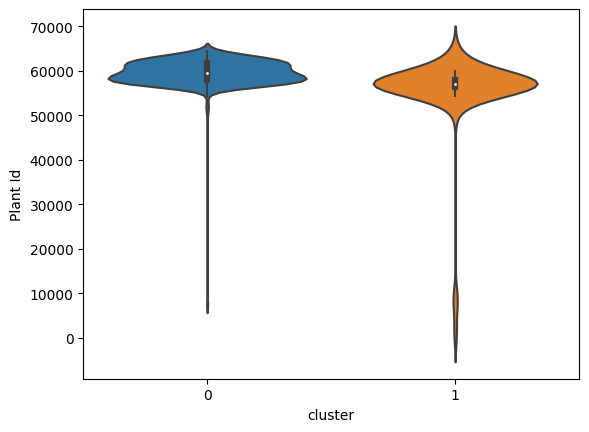

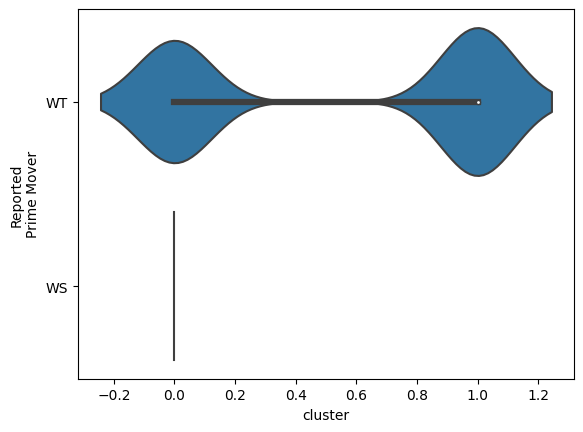

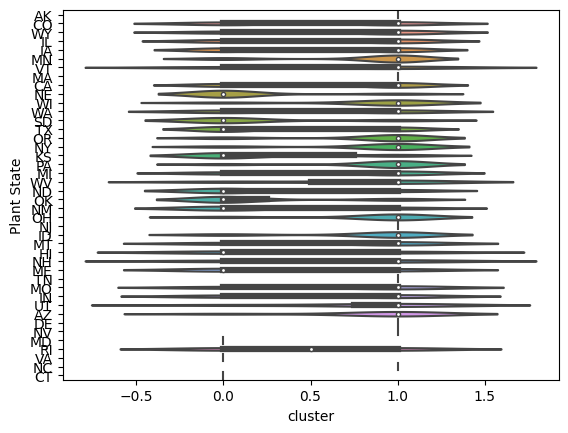

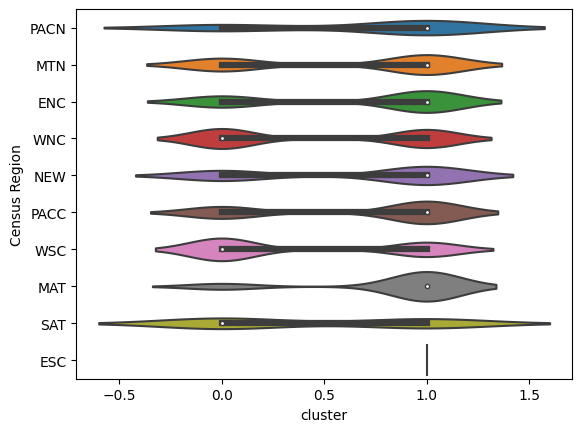

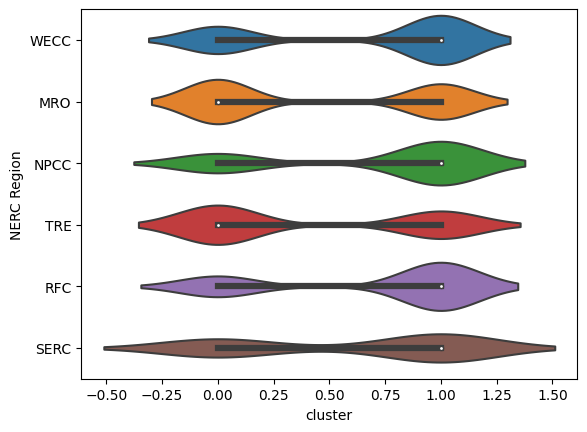

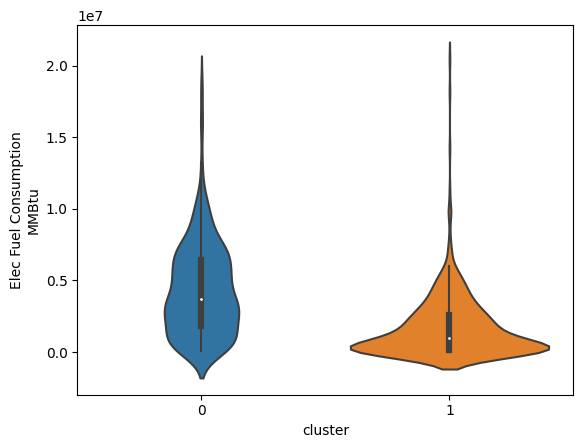

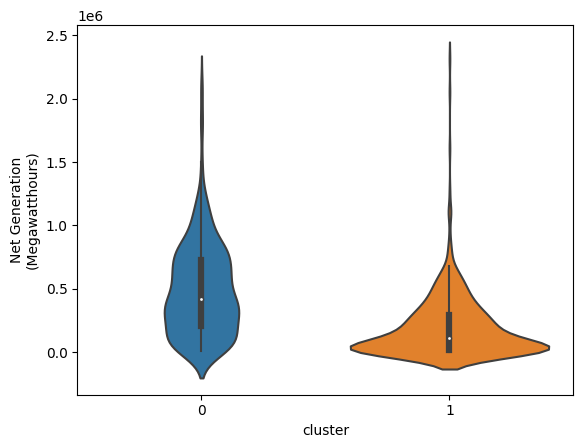

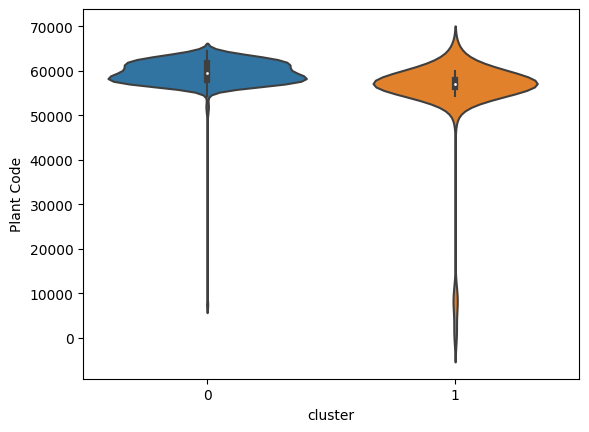

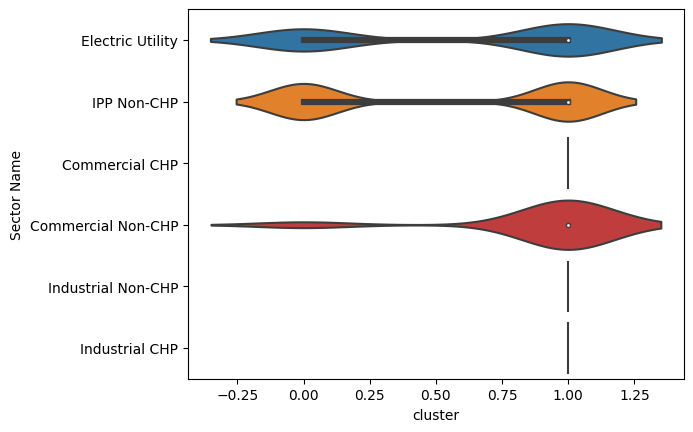

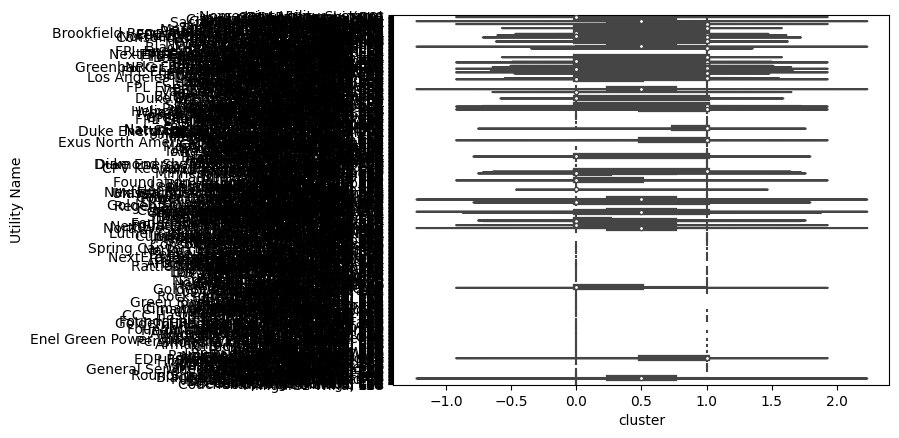

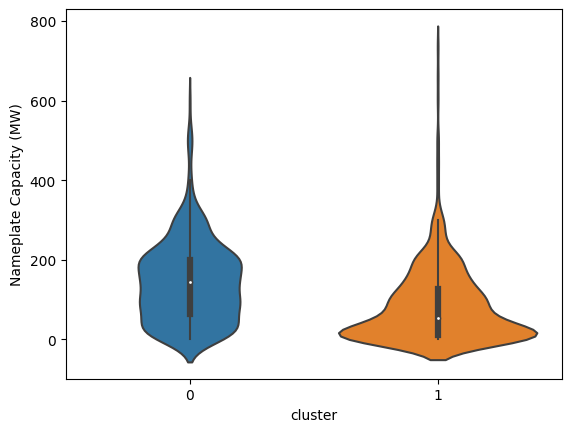

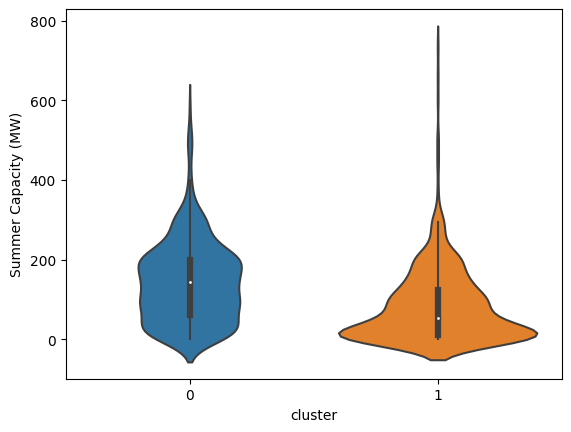

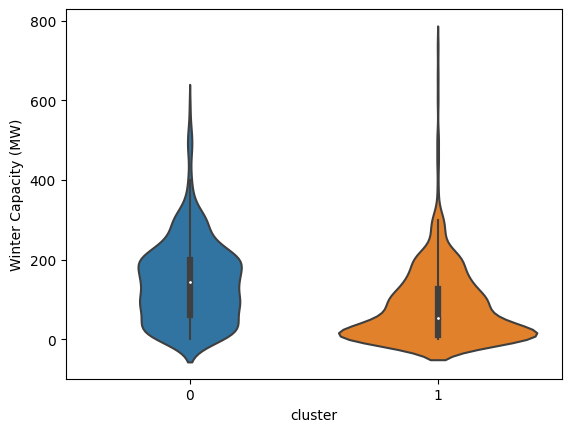

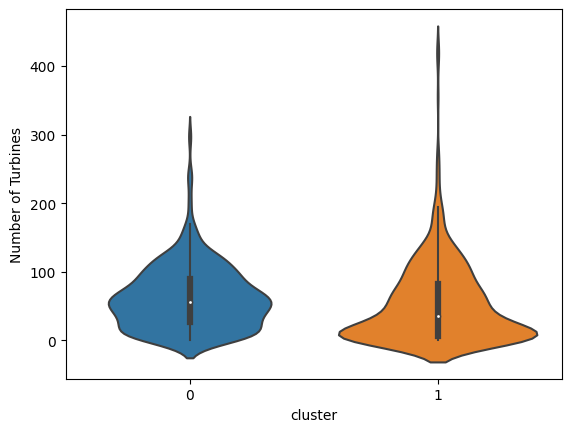

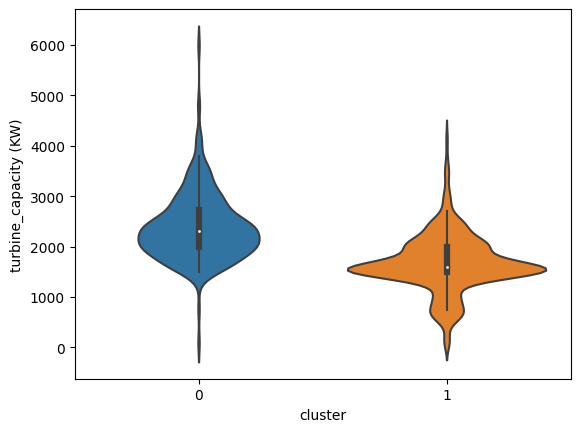

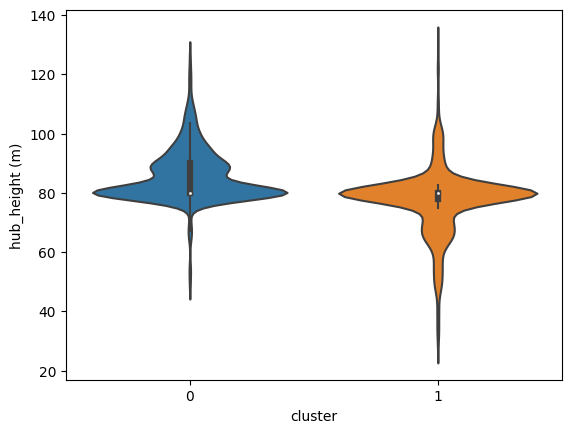

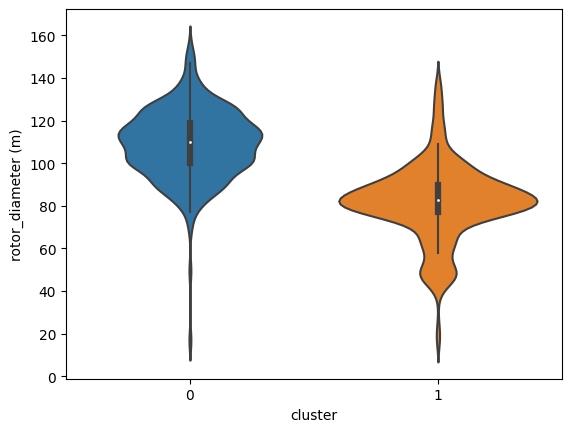

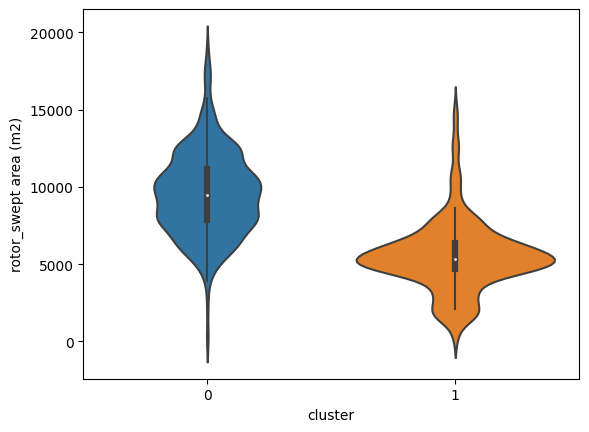

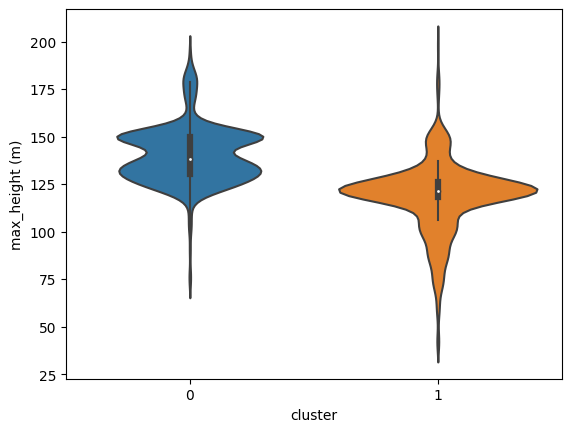

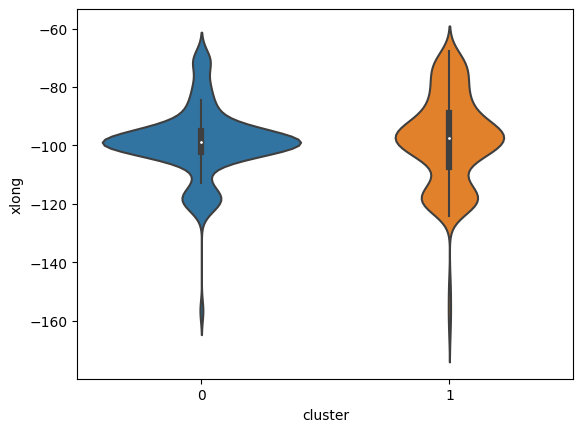

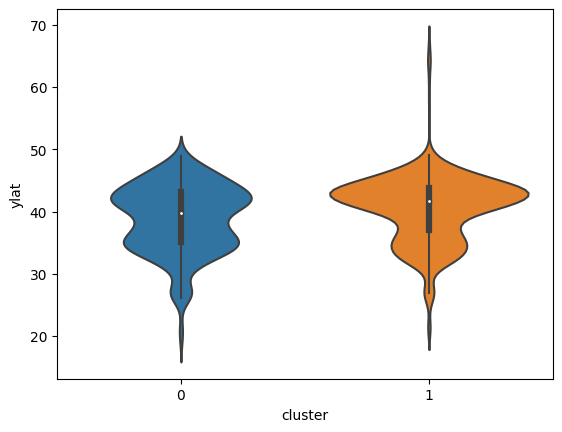

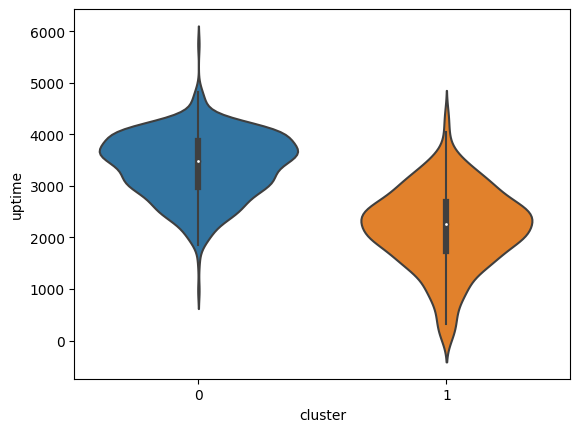

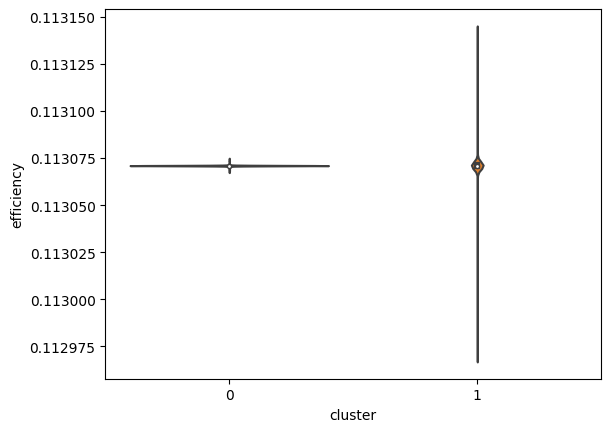

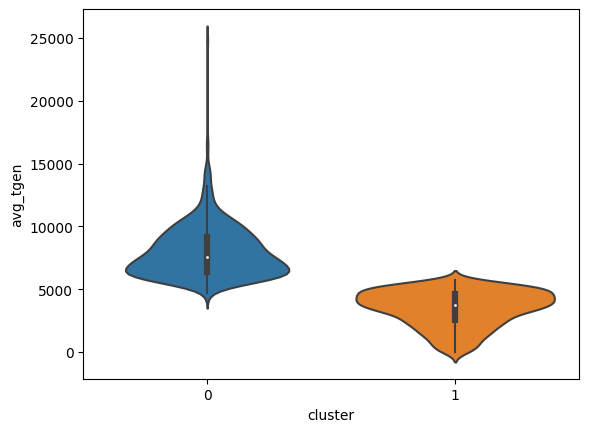

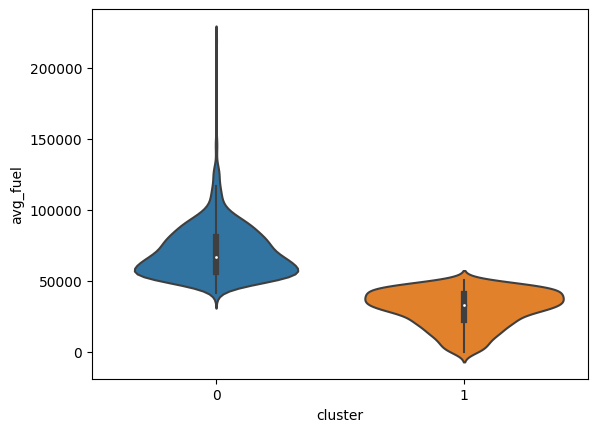

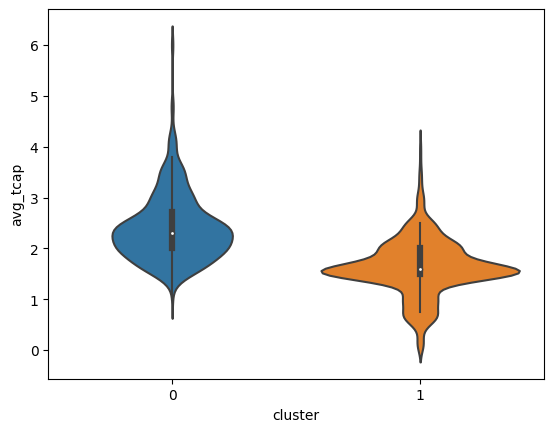

In [63]:
# show bar charts of clusters
for col in final_copy.columns:
    if col != 'cluster':
        sns.violinplot(x='cluster', y=col, data=final_copy)
        plt.show()

In [64]:
final_copy.to_csv('final_copy.csv')

In [65]:
# plot scatter plot of lat long with cluster by color on a map
fig = px.scatter_mapbox(final_copy, lat="ylat", lon="xlong", color="cluster", zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [66]:
final_copy.describe()

Plant Id  Elec Fuel Consumption\nMMBtu  \
count   1137.00                       1137.00   
mean   57397.62                    2896871.65   
std     7908.39                    2997086.89   
min       90.00                        478.00   
25%    56793.00                     479123.00   
50%    57762.00                    2097902.00   
75%    59972.00                    4398492.00   
max    64623.00                   20464778.00   

       Net Generation\n(Megawatthours)  Plant Code  Nameplate Capacity (MW)  \
count                          1137.00     1137.00                  1137.00   
mean                         327552.11    57397.62                   110.91   
std                          338883.68     7908.39                   102.31   
min                              54.00       90.00                     1.00   
25%                           54175.00    56793.00                    22.40   
50%                          237212.00    57762.00                    98.80   
75%                          497342.00    59972.00                   171.70   
max                         2313973.00    64623.00                   735.50   

       Summer Capacity (MW)  Winter Capacity (MW)  Number of Turbines  \
count               1137.00               1137.00             1137.00   
mean                 110.29                110.36               57.12   
std                  101.86                101.88               53.70   
min                    0.40                  0.50                1.00   
25%                   21.60                 21.60               12.00   
50%                   98.70                 98.70               48.00   
75%                  172.00                174.00               87.00   
max                  735.50                735.50              426.00   

       turbine_capacity (KW)  hub_height (m)  rotor_diameter (m)  \
count                1137.00         1124.00             1130.00   
mean                 1995.31           81.20               94.23   
std                   705.28           10.69               21.80   
min                    65.00           28.59               16.50   
25%                  1500.00           80.00               82.00   
50%                  2000.00           80.00               92.36   
75%                  2335.16           85.00              110.00   
max                  6000.00          130.00              155.00   

       rotor_swept area (m2)  max_height (m)   xlong    ylat  uptime  \
count                1130.00         1124.00 1137.00 1137.00 1137.00   
mean                 7355.09          128.49  -98.67   39.80 2737.33   
std                  3193.33           19.94   14.17    5.45  929.56   
min                   213.82           41.53 -165.43   18.97   13.73   
25%                  5281.02          121.00 -103.28   35.42 2110.64   
50%                  6716.40          126.50  -98.40   41.10 2751.96   
75%                  9503.32          139.90  -92.78   43.56 3466.04   
max                 18869.19          198.10  -67.81   66.84 5750.48   

       efficiency  avg_tgen  avg_fuel  avg_tcap  cluster  
count     1137.00   1137.00   1137.00   1137.00  1137.00  
mean         0.11   5545.01  49040.07      1.98     0.55  
std          0.00   2834.13  25065.02      0.71     0.50  
min          0.11      1.35     11.93      0.06     0.00  
25%          0.11   3634.20  32140.60      1.50     0.00  
50%          0.11   5244.23  46379.99      2.00     1.00  
75%          0.11   7300.02  64561.41      2.30     1.00  
max          0.11  24791.50 219256.50      6.00     1.00